In [88]:
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import math
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime as dt


factors = pd.read_excel("factor_pricing_data.xlsx",sheet_name = "factors (excess)")
assets = pd.read_excel("factor_pricing_data.xlsx",sheet_name = "assets (excess)")
factors.set_index('Date', inplace = True)
assets.set_index('Date', inplace = True)
print("*** Factor Data ***")
display(factors)
print("*** Factor Data ***")
print("\n")
print("\n")
print("\n")


print("*** Asset Data ***")
display(assets)
print("*** Asset Data ***")

*** Factor Data ***


,MKT,SMB,HML,UMD
Date,,,,
1990-01-31,-0.079,-0.013,0.009,-0.033
1990-02-28,0.011,0.010,0.006,-0.005
1990-03-31,0.018,0.015,-0.029,0.018
1990-04-30,-0.034,-0.005,-0.026,0.024
1990-05-31,0.084,-0.026,-0.038,0.030
...,...,...,...,...
2021-12-31,0.031,-0.016,0.032,-0.026
2022-01-31,-0.062,-0.059,0.127,-0.025
2022-02-28,-0.023,0.022,0.031,0.018


*** Factor Data ***






*** Asset Data ***


,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
Date,,,,,,,,,,,,
1990-01-31,-0.100,-0.044,-0.062,-0.049,-0.086,-0.018,-0.140,-0.059,-0.070,-0.079,-0.103,-0.079
1990-02-28,-0.010,0.046,0.021,0.025,0.016,0.035,-0.009,-0.004,0.014,-0.026,0.018,0.024
1990-03-31,0.039,0.023,0.040,-0.012,0.016,0.038,0.035,-0.014,0.045,0.032,-0.022,0.013
1990-04-30,-0.010,-0.047,-0.036,-0.042,-0.029,-0.027,-0.042,-0.062,-0.028,-0.004,-0.049,-0.029
1990-05-31,0.084,0.071,0.071,0.053,0.082,0.119,0.087,0.047,0.110,0.121,0.086,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,0.080,-0.044,0.041,0.031,0.096,0.018,0.038,0.086,0.013,0.067,0.048,0.053
2022-01-31,-0.007,-0.102,-0.056,0.173,-0.062,-0.083,-0.020,-0.021,-0.089,-0.086,-0.006,-0.062
2022-02-28,-0.005,-0.072,-0.002,0.081,-0.035,-0.051,0.003,-0.011,-0.015,-0.011,-0.017,0.002


*** Asset Data ***


# 2.1 Factor statistics (annualized)

In [89]:
def metricsStat(returns, annualization = 1):
    metrics = pd.DataFrame(index = returns.columns)
    metrics['Mean'] = returns.mean() * annualization
    metrics['Volatility'] = returns.std() * annualization
    metrics['Sharpe'] = (returns.mean() / returns.std()) * np.sqrt(annualization)
    metrics['VaR(5th)'] = returns.quantile(0.05)
    
    return metrics

print("*** Factor statistics (annualized) ***")
display(metricsStat(factors,12))
print("*** Factor statistics (annualized) ***")
print("\n")
print("\n")
print("\n")

print("*** Factor statistics (not annualized) ***")
display(metricsStat(factors,1))
print("*** Factor statistics (not annualized) ***")

*** Factor statistics (annualized) ***


,Mean,Volatility,Sharpe,VaR(5th)
MKT,0.084,0.526,0.555,-0.076
SMB,0.012,0.380,0.111,-0.043
HML,0.018,0.385,0.164,-0.042
UMD,0.057,0.566,0.351,-0.071


*** Factor statistics (annualized) ***






*** Factor statistics (not annualized) ***


,Mean,Volatility,Sharpe,VaR(5th)
MKT,0.007,0.044,0.160,-0.076
SMB,0.001,0.032,0.032,-0.043
HML,0.002,0.032,0.047,-0.042
UMD,0.005,0.047,0.101,-0.071


*** Factor statistics (not annualized) ***


Yes, each factor appears to have positive excess return because their mean (annualized) return are all positive.

# 2.2 Correlation matrix

,MKT,SMB,HML,UMD
MKT,1.000,0.242,-0.132,-0.280
SMB,0.242,1.000,-0.221,0.007
HML,-0.132,-0.221,1.000,-0.230
UMD,-0.280,0.007,-0.230,1.000


<AxesSubplot:>

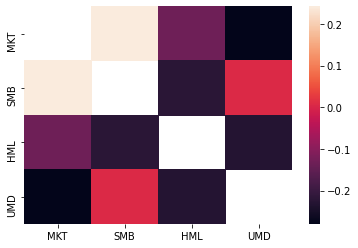

In [90]:
Corr_Matrix = factors.corr()
display(Corr_Matrix)
Corr_Matrix[Corr_Matrix == 1] = None #Nullify

sns.heatmap(Corr_Matrix)

Mostly yes. The correlation are all very small, with the maximum correlation to be between SMB and MKT factors. 

# 2.3 Cummulative returns of factors

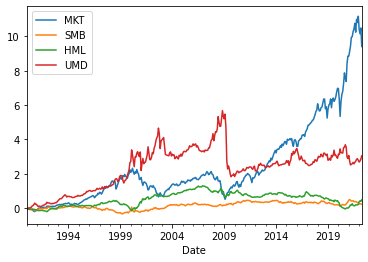

In [91]:
cum_rets = (1 + factors).cumprod() - 1
cum_rets[['MKT','SMB','HML','UMD']].loc[:'2022'].plot()
plt.show()

## 2.4 Asset statistics

In [92]:
asset_stat = metricsStat(assets,12)
print("*** Asset's excess return statistics (annualized) ***")
display(asset_stat)
print("*** Asset's excess return statistics (annualized) ***")

*** Asset's excess return statistics (annualized) ***


,Mean,Volatility,Sharpe,VaR(5th)
NoDur,0.086,0.457,0.651,-0.057
Durbl,0.106,0.936,0.394,-0.112
Manuf,0.101,0.640,0.547,-0.084
Enrgy,0.087,0.763,0.395,-0.095
Chems,0.086,0.512,0.581,-0.072
BusEq,0.125,0.815,0.531,-0.111
Telcm,0.055,0.607,0.313,-0.090
Utils,0.075,0.479,0.543,-0.063
Shops,0.097,0.556,0.603,-0.072
Hlth,0.097,0.531,0.633,-0.073


*** Asset's excess return statistics (annualized) ***


# 2.5 Mean explained by volatility and VaR(5th)

In [93]:
def get_ols_metrics(regressors,targets,annualization=1):
    
    # ensure regressors and targets are pandas dataframes, as expected
    if not isinstance(regressors,pd.DataFrame):
        regressors = regressors.to_frame()
    if not isinstance(targets,pd.DataFrame):
        targets = targets.to_frame()

    # align the targets and regressors on the same dates
    df_aligned = targets.join(regressors,how='inner',lsuffix='y ')
    Y = df_aligned[targets.columns]
    X = df_aligned[regressors.columns]

    reg = pd.DataFrame(index=targets.columns)
    for col in Y.columns:
        y = Y[col]
        model = LinearRegression().fit(X,y)
        reg.loc[col,'alpha'] = model.intercept_ * annualization
        reg.loc[col,regressors.columns] = model.coef_
        reg.loc[col,'r-squared'] = model.score(X,y)

        # sklearn does not return the residuals, so we need to build them
        yfit = model.predict(X)
        residuals = y - yfit    
        reg.loc[col,'Info Ratio'] = (model.intercept_ / residuals.std()) * np.sqrt(annualization)

    return reg

#regressor = pd.DataFrame().assign(Volatility = asset_stat['Volatility'], VaR = asset_stat['VaR(5th)'])
#print(type(regressor))
#display(regressor)
#display(get_ols_metrics(regressor,asset_stat['Mean']))
display(get_ols_metrics(asset_stat['Volatility'],asset_stat['Mean']))
display(get_ols_metrics(asset_stat['VaR(5th)'],asset_stat['Mean']))

,alpha,Volatility,r-squared,Info Ratio
Mean,0.047,0.067,0.253,2.789


,alpha,VaR(5th),r-squared,Info Ratio
Mean,0.049,-0.475,0.180,2.821


From the r-squared statistics above, volatility explaines 25.3% of differences in mean return, and VaR(5th) explained 18% of difference in mean return.

# 3.1,2 CAPM regression

In [94]:
mkt = pd.DataFrame().assign(mkt = factors['MKT'])
regs_mkt = get_ols_metrics(mkt,assets)
regs_mkt['Treynor'] = asset_stat['Mean'] / regs_mkt['mkt']
display(regs_mkt)

,alpha,mkt,r-squared,Info Ratio,Treynor
NoDur,0.003,0.631,0.529,0.104,0.136
Durbl,-0.001,1.361,0.585,-0.014,0.078
Manuf,0.001,1.103,0.823,0.030,0.092
Enrgy,0.001,0.844,0.339,0.026,0.103
Chems,0.002,0.766,0.619,0.067,0.112
BusEq,0.001,1.335,0.743,0.030,0.094
Telcm,-0.002,0.924,0.642,-0.064,0.059
Utils,0.003,0.409,0.202,0.095,0.183
Shops,0.002,0.894,0.716,0.072,0.108
Hlth,0.003,0.721,0.510,0.097,0.134


# 3.3 If CAPM is true

If CAPM is true, then all the alphas should be 0. Treynor ratio should represent the systematic risk, which is expected return of asset i over its beta of market factor. 

# 3.4 MAE

In [79]:
MAE = regs_mkt['alpha'].abs().mean()
print(f'MAE of alphas is: {MAE:0.4f}')
print("\n")
print("If we are not using the CAPM pricing model:")
print(f'MAE of alphas is: {assets.mean().abs().mean():0.4f}')

MAE of alphas is: 0.0017


If we are not using the CAPM pricing model:
MAE of alphas is: 0.0074


If the pricing model worked, MAE of alpha should be close to 0. Since MAE of alphas from CAPM pricing model is much smaller than without CAPM, this is a good indicator that the CAPM is a decent pricing model.

# 4.1 Fama French 4-factor model

In [86]:
regs_ff = get_ols_metrics(factors,assets)
display(regs_ff)

,alpha,MKT,SMB,HML,UMD,r-squared,Info Ratio
NoDur,0.002,0.693,-0.224,0.181,0.018,0.593,0.088
Durbl,0.000,1.283,0.226,0.390,-0.253,0.645,0.005
Manuf,0.001,1.090,0.099,0.267,-0.072,0.857,0.030
Enrgy,-0.000,0.895,0.100,0.664,0.013,0.444,-0.004
Chems,0.001,0.813,-0.170,0.212,-0.012,0.668,0.055
BusEq,0.003,1.207,0.183,-0.643,-0.115,0.842,0.121
Telcm,-0.001,0.933,-0.168,-0.036,-0.057,0.654,-0.050
Utils,0.002,0.513,-0.219,0.312,0.119,0.304,0.055
Shops,0.002,0.895,-0.032,-0.006,-0.015,0.717,0.077
Hlth,0.003,0.761,-0.196,-0.151,0.066,0.542,0.095


# 4.2 MAE of 4-factor model

In [87]:
MAE = regs_ff['alpha'].abs().mean()
print(f'MAE of alphas is: {MAE:0.4f}')

MAE of alphas is: 0.0016


If the pricing model worked, MAE of alpha should be close to 0. Since MAE of alphas from this 4-factor pricing model is much smaller than CAPM, which is a good indicator that the 4-factor is a better pricing model than CAPM.